# 🛣️ Análise de Acidentes de Trânsito no Brasil

## 🎯 Propósito

Este projeto tem como finalidade analisar os dados de acidentes de trânsito no Brasil para entender melhor os padrões que contribuem para essas ocorrências.

A escolha do tema se baseia em três fatores principais:

- **Impacto social:** Acidentes de trânsito causam milhares de mortes e feridos todos os anos, com graves consequências humanas, econômicas e estruturais.
- **Relevância real:** É um problema presente no cotidiano brasileiro e de grande interesse público.
- **Disponibilidade de dados:** Há bases confiáveis e públicas que possibilitam uma análise rica e informativa.

## 🧭 Objetivo

O objetivo principal é identificar padrões perigosos relacionados aos acidentes de trânsito, com foco na prevenção e apoio à tomada de decisões estratégicas por parte de gestores públicos, sociedade e órgãos de segurança.

A análise vai buscar responder perguntas como:

- Quais os horários com maior número de acidentes?
- Há mais ocorrências em finais de semana?
- Quais os tipos mais frequentes de acidentes?
- Quais regiões concentram o maior número de ocorrências?

## 📁 Fonte dos Dados

Os dados utilizados neste projeto foram obtidos na plataforma [Kaggle](https://www.kaggle.com/datasets/mlippo/car-accidents-in-brazil-2017-2023), disponibilizados por **Matheus Lippo**.

O dataset contém registros de acidentes de trânsito no Brasil de **2017 a 2023**, baseados em dados da **Polícia Rodoviária Federal (PRF)**.


#### Importando as bibliotecas necessárias para análise

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Definindo o estilo dos gráficos
sns.set(style="whitegrid")

# Mostrar todas as colunas nos prints
pd.set_option('display.max_columns', None)


#### Carregando o dataset

In [6]:
 # Caminho para o dataset
caminho_data = '../data/accidents_2017_to_2023_portugues.csv'

# Carregando o dataset
df = pd.read_csv(caminho_data)

## Análise Exploratória

Vamos examinar a estrutura e as características principais do dataset antes de gerar gráficos.

As análises a seguir ajudarão a entender:

- A quantidade de registros e colunas
- Tipos de dados presentes
- Existência de valores ausentes
- Quais categorias existem nas colunas mais relevantes
- Descobrir se o clima afeta a quantidade e o tipo de acidente

In [7]:
# Visualizando as primeiras linhas do gráfico
df.head()

,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia
0,2017-01-01,domingo,01:45:00,RS,116.0,"34,9",VACARIA,Defeito Mecânico no Veículo,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Reta,6,0,4,0,2,0,4,2,-28.50712,-50.94118,SPRF-RS,DEL05-RS
1,2017-01-01,domingo,01:00:00,PR,376.0,636,TIJUCAS DO SUL,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Fatais,Plena Noite,Crescente,Garoa/Chuvisco,Dupla,Curva,2,1,0,0,1,0,0,2,-25.75400,-49.12660,SPRF-PR,DEL01-PR
2,2017-01-01,domingo,04:40:00,BA,101.0,65,ENTRE RIOS,Condutor Dormindo,Colisão frontal,Com Vítimas Fatais,Amanhecer,Decrescente,Nublado,Simples,Curva,5,1,1,1,2,0,2,2,-11.96180,-38.09530,SPRF-BA,DEL01-BA
3,2017-01-01,domingo,06:30:00,PA,316.0,"72,5",CASTANHAL,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Fatais,Amanhecer,Decrescente,Céu Claro,Simples,Reta,4,1,0,0,3,0,0,3,-1.28998,-47.83483,SPRF-PA,DEL01-PA
4,2017-01-01,domingo,09:00:00,GO,20.0,"220,5",POSSE,Defeito na Via,Colisão com objeto estático,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Desvio Temporário,3,0,2,1,0,0,3,1,-14.14221,-46.32259,SPRF-DF,DEL02-DF


#### 📐 Estrutura do dataset

Vamos verificar quantas linhas e colunas existem, e quais são os nomes das colunas disponíveis.


In [8]:
# Número de linhas e colunas
df.shape

(463152, 27)

In [9]:
# Lista de colunas disponíveis
df.columns.tolist()

['data_inversa',
 'dia_semana',
 'horario',
 'uf',
 'br',
 'km',
 'municipio',
 'causa_acidente',
 'tipo_acidente',
 'classificacao_acidente',
 'fase_dia',
 'sentido_via',
 'condicao_metereologica',
 'tipo_pista',
 'tracado_via',
 'pessoas',
 'mortos',
 'feridos_leves',
 'feridos_graves',
 'ilesos',
 'ignorados',
 'feridos',
 'veiculos',
 'latitude',
 'longitude',
 'regional',
 'delegacia']

#### 🧠 Tipos de dados e valores ausentes

Nesta etapa, vamos verificar os tipos de dados de cada coluna, além de ver se há colunas com valores ausentes.


In [10]:
# Informações gerais do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   data_inversa            463152 non-null  object 
 1   dia_semana              463152 non-null  object 
 2   horario                 463152 non-null  object 
 3   uf                      463152 non-null  object 
 4   br                      462162 non-null  float64
 5   km                      462162 non-null  object 
 6   municipio               463152 non-null  object 
 7   causa_acidente          463152 non-null  object 
 8   tipo_acidente           463112 non-null  object 
 9   classificacao_acidente  463152 non-null  object 
 10  fase_dia                463152 non-null  object 
 11  sentido_via             463152 non-null  object 
 12  condicao_metereologica  463152 non-null  object 
 13  tipo_pista              463152 non-null  object 
 14  tracado_via         

In [11]:
# Verificando valores nulos por coluna
df.isnull().sum()


data_inversa                 0
dia_semana                   0
horario                      0
uf                           0
br                         990
km                         990
municipio                    0
causa_acidente               0
tipo_acidente               40
classificacao_acidente       0
fase_dia                     0
sentido_via                  0
condicao_metereologica       0
tipo_pista                   0
tracado_via                  0
pessoas                      0
mortos                       0
feridos_leves                0
feridos_graves               0
ilesos                       0
ignorados                    0
feridos                      0
veiculos                     0
latitude                     0
longitude                    0
regional                    10
delegacia                 1310
dtype: int64

#### 📊 Estatísticas descritivas das colunas numéricas

Nesta etapa, vamos verificar médias, desvios, valores mínimos e máximos das colunas numéricas.


In [12]:
df.describe()

,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
count,462162.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,4.631520e+05,4.631520e+05
mean,213.432900,2.362373,0.079235,0.835469,0.259530,1.044070,0.144069,1.094999,1.645725,-2.343287e+03,-8.924977e+03
std,130.757607,1.924801,0.332169,1.075275,0.602814,1.502419,0.438168,1.205351,0.731394,1.519113e+06,5.903043e+06
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.033383e+09,-4.016764e+09
25%,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.533123e+01,-5.030294e+01
50%,163.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-2.042034e+01,-4.780831e+01
75%,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-1.282657e+01,-4.264249e+01
max,498.000000,80.000000,21.000000,61.000000,31.000000,73.000000,54.000000,66.000000,23.000000,1.630000e+02,7.170000e+02


#### 🔎 Valores únicos em colunas categóricas

Vamos analisar a distribuição de valores em algumas colunas categóricas que serão importantes na análise.


In [13]:
df['tipo_acidente'].value_counts()


Colisão traseira                   86472
Saída de leito carroçável          75549
Colisão transversal                57065
Tombamento                         36750
Colisão lateral                    35411
Colisão frontal                    30242
Colisão com objeto estático        21743
Atropelamento de Pedestre          21278
Queda de ocupante de veículo       20123
Capotamento                        16849
Colisão lateral mesmo sentido      16301
Colisão com objeto                 12911
Atropelamento de Animal             8424
Incêndio                            7655
Engavetamento                       6865
Colisão lateral sentido oposto      4727
Colisão com objeto em movimento     1594
Derramamento de carga               1350
Danos eventuais                     1003
Eventos atípicos                     800
Name: tipo_acidente, dtype: int64

In [14]:
df['dia_semana'].value_counts()


sábado           77133
domingo          76960
sexta-feira      71435
segunda-feira    62816
quinta-feira     60329
quarta-feira     57878
terça-feira      56601
Name: dia_semana, dtype: int64

In [15]:
df['fase_dia'].value_counts()


Pleno dia      253139
Plena Noite    161662
Anoitecer       25550
Amanhecer       22801
Name: fase_dia, dtype: int64

In [16]:
df['classificacao_acidente'].value_counts()


Com Vítimas Feridas    332213
Sem Vítimas             99595
Com Vítimas Fatais      31344
Name: classificacao_acidente, dtype: int64

##  🧹Limpeza e Preparação dos Dados

Nesta etapa, vamos preparar o dataset para a análise, realizando as seguintes tarefas:

- Conversão de tipos de dados (data e hora)
- Padronização de valores decimais e categorias
- Criação de novas colunas úteis para análise temporal
- Tratamento de valores ausentes em colunas categóricas


#### 📆 Convertendo a coluna de data para o tipo datetime


In [17]:
# Convertendo a coluna 'data_inversa' para datetime
df['data_inversa'] = pd.to_datetime(df['data_inversa'], format='%Y-%m-%d')

In [18]:
df.dtypes['data_inversa']


dtype('<M8[ns]')

#### 🛠️ Padronizando a coluna 'km' para formato numérico
Corrigindo a coluna 'km' que está como texto com vírgula como separador decimal.


In [19]:
# 1. Converte para string antes de aplicar .str.replace()
df['km'] = df['km'].astype(str).str.replace(',', '.', regex=False).astype(float)


In [20]:
df.dtypes['km']


dtype('float64')

#### 🕐 Criando a coluna 'periodo_do_dia' com base no horário

Vamos categorizar os horários em períodos do dia:
- Madrugada: 00h às 04h59
- Manhã: 05h às 11h59
- Tarde: 12h às 17h59
- Noite: 18h às 23h59


In [21]:
# Função para categorizar períodos
def categorizar_periodo(horario):
    hora = int(horario.split(':')[0])
    if 5 <= hora < 12:
        return 'manhã'
    elif 12 <= hora < 18:
        return 'tarde'
    elif 18 <= hora < 24:
        return 'noite'
    else:
        return 'madrugada'
     #Aplicando a função
df['periodo_do_dia'] = df['horario'].apply(categorizar_periodo)

In [22]:
df[['horario', 'periodo_do_dia']].head(10)


,horario,periodo_do_dia
0,01:45:00,madrugada
1,01:00:00,madrugada
2,04:40:00,madrugada
3,06:30:00,manhã
4,09:00:00,manhã
5,07:40:00,manhã
6,10:35:00,manhã
7,11:50:00,manhã
8,10:30:00,manhã
9,08:30:00,manhã


In [23]:
df['periodo_do_dia'].value_counts()

manhã        142394
tarde        142014
noite        133486
madrugada     45258
Name: periodo_do_dia, dtype: int64

In [24]:
df['periodo_do_dia'].unique()


array(['madrugada', 'manhã', 'tarde', 'noite'], dtype=object)

#### 📅 Criando as colunas 'ano' e 'mes' a partir da data


In [25]:
df['ano'] = df['data_inversa'].dt.year
df['mes'] = df['data_inversa'].dt.month


#### 🧼 Tratando valores ausentes em colunas categóricas

Vamos preencher valores nulos com 'Não informado' ou 'Desconhecido' para não perder registros na análise.


In [26]:
df['tipo_acidente'].fillna('Não informado', inplace=True)
df['regional'].fillna('Desconhecido', inplace=True)
df['delegacia'].fillna('Desconhecido', inplace=True)

In [27]:
df.isnull().sum()

data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        990
km                        990
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    0
delegacia                   0
periodo_do_dia              0
ano                         0
mes                         0
dtype: int64

## 🖼️ Visualizações e Insights

#### 1. Evolução dos acidentes por ano

Vamos analisar a evolução do número de acidentes ao longo dos anos (agrupando todos os anos).


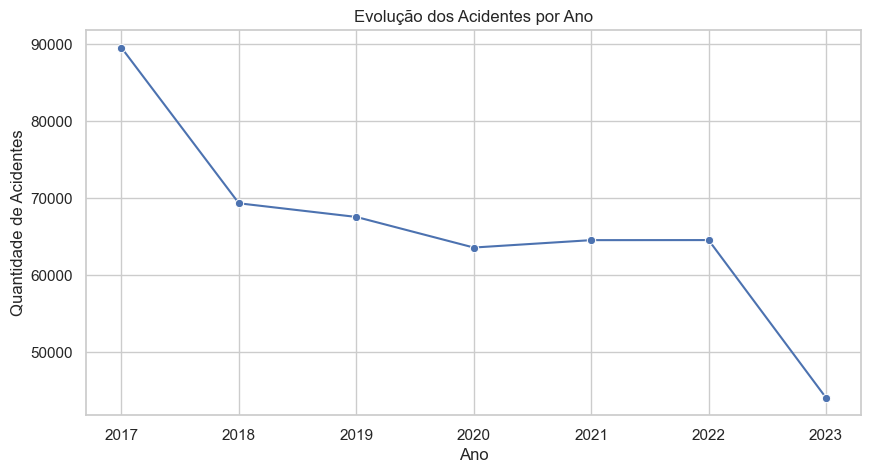

In [52]:
# Acidentes por ano
cont_ano = df['ano'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=cont_ano.index, y=cont_ano.values, marker='o')
plt.title('Evolução dos Acidentes por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Acidentes')
plt.show()


 **Insight:**  
A quantidade de acidentes de trânsito no Brasil apresentou uma **tendência de queda entre 2017 e 2023**. O ano de 2017 foi o mais crítico, com quase 90 mil registros. Entre 2018 e 2022 houve uma relativa estabilidade, mas com leve declínio.  

Em 2023, observa-se uma queda acentuada, o que pode estar relacionado à **parcialidade dos dados disponíveis até a data de extração** ou a mudanças significativas no registro ou fiscalização. É importante considerar esse viés ao interpretar os números de 2023.


#### 2. Evolução dos acidentes por mês

Vamos analisar a evolução do número de acidentes ao longo dos mes (agrupando todos os meses).


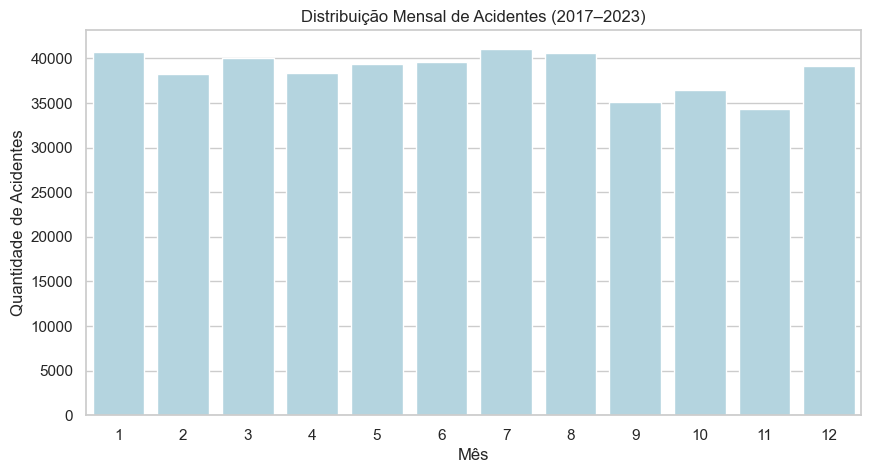

In [66]:
# Acidentes por mês
cont_mes = df['mes'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    x=cont_mes.index,
    y=cont_mes.values,
    color='lightblue'  
)

plt.title('Distribuição Mensal de Acidentes (2017–2023)')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Acidentes')

plt.show()


**Insight:**  
A distribuição mensal de acidentes entre 2017 e 2023 mostra certa **regularidade ao longo do ano**, com destaque para os meses de **janeiro, julho e agosto**, que apresentam os maiores volumes de ocorrências.

Esses meses coincidem com **férias escolares e feriados prolongados**, períodos em que o tráfego rodoviário tende a aumentar, o que pode justificar o crescimento nos registros. Já os **meses de outubro e novembro** registram os menores números, sugerindo uma possível redução de deslocamentos longos nesse período.


#### 3. Acidentes por Período do Dia

Vamos analisar em quais momentos do dia ocorrem mais acidentes, dividindo os registros entre madrugada, manhã, tarde e noite.


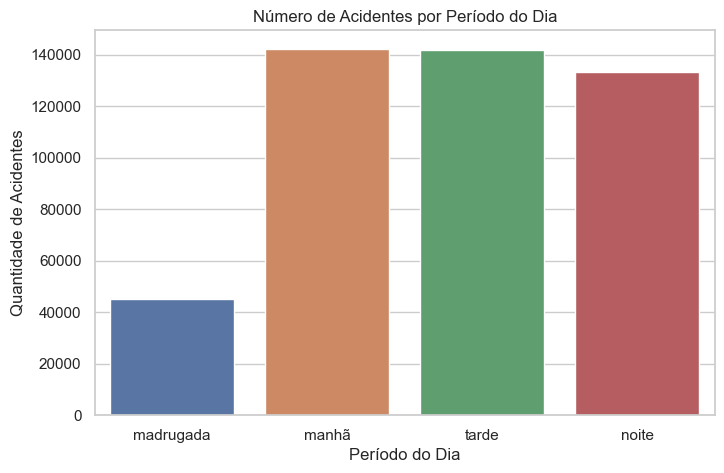

In [67]:
# Período do dia
cont_periodo = df['periodo_do_dia'].value_counts().reindex(['madrugada','manhã','tarde','noite'])
plt.figure(figsize=(8,5))
sns.barplot(x=cont_periodo.index, y=cont_periodo.values)
plt.title('Número de Acidentes por Período do Dia')
plt.xlabel('Período do Dia')
plt.ylabel('Quantidade de Acidentes')
plt.show()


**Insight:**  
A maioria dos acidentes acontece durante o dia, especialmente nos períodos da **manhã** e da **tarde**, que concentram volumes semelhantes de ocorrências. A **noite** aparece em terceiro lugar, enquanto a **madrugada** é o período com menor número absoluto de registros.

Esse padrão pode estar relacionado à maior movimentação de veículos durante os horários de trabalho e deslocamentos urbanos. A baixa frequência na madrugada, embora esperada pela menor circulação, não necessariamente representa menor risco proporcional, algo que vamos explorar mais a frente.


#### 4.  Acidentes por Dia da Semana

Agora vamos analisar a distribuição dos acidentes ao longo dos dias da semana, identificando se há concentração maior em dias úteis ou nos finais de semana.


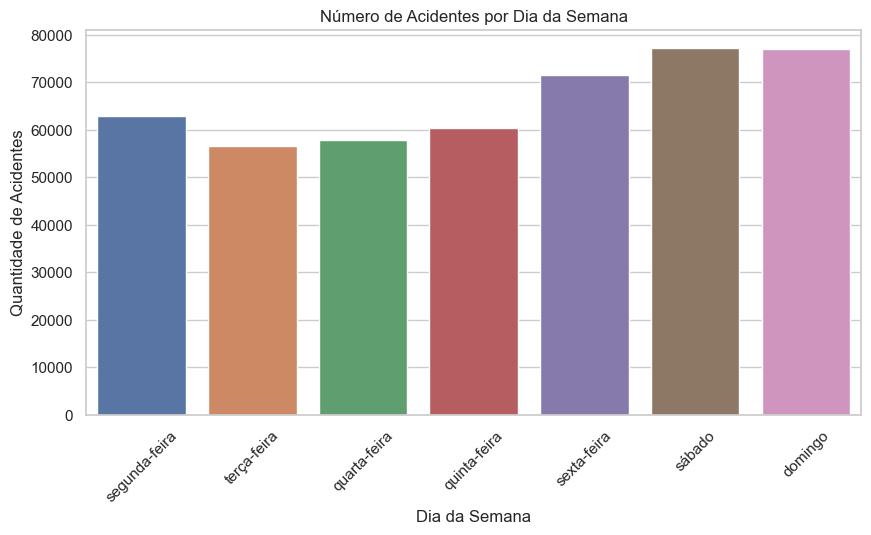

In [86]:
# Dia da semana
dias = ['segunda-feira','terça-feira','quarta-feira','quinta-feira','sexta-feira','sábado','domingo']
cont_dia = df['dia_semana'].value_counts().reindex(dias)
plt.figure(figsize=(10,5))
sns.barplot(x=cont_dia.index, y=cont_dia.values)
plt.title('Número de Acidentes por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=45)
plt.show()


**Insight:**  
Os **finais de semana** apresentam os maiores números de acidentes, com destaque para **sábado e domingo**, que ultrapassam os 75 mil registros cada. Isso sugere um aumento significativo no tráfego rodoviário nesses dias, possivelmente ligado a viagens, lazer e consumo de álcool.

Durante a semana, os números são mais equilibrados, com uma leve queda entre **terça e quarta-feira**, e um novo crescimento a partir de **quinta** e **sexta-feira**, indicando que o risco de acidentes pode estar ligado ao volume e tipo de deslocamento realizado em cada período.


#### 5. Classificação dos Acidentes

Nesta visualização, vamos observar a proporção de acidentes classificados como com vítimas feridas, sem vítimas e com vítimas fatais.


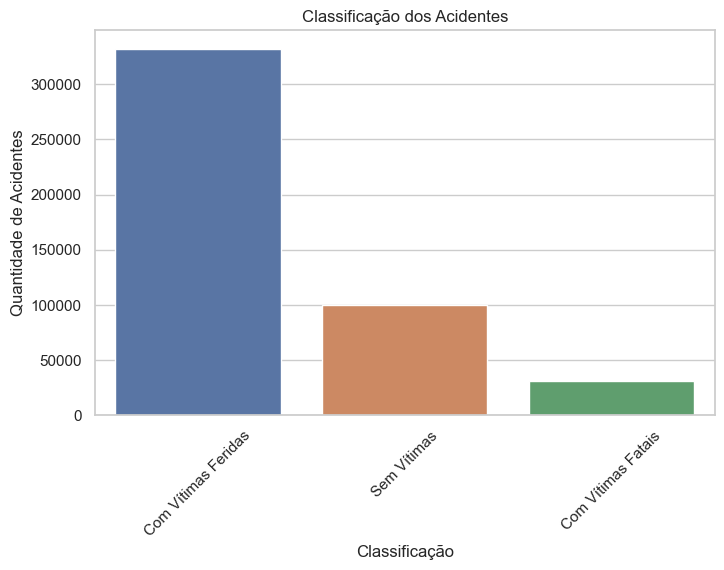

In [69]:
# Classificação do acidente
cont_class = df['classificacao_acidente'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=cont_class.index, y=cont_class.values)
plt.title('Classificação dos Acidentes')
plt.xlabel('Classificação')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=45)
plt.show()


**Insight:**  
A grande maioria dos acidentes registrados entre 2017 e 2023 foram classificados como **"Com Vítimas Feridas"**, representando mais de 70% do total. Em seguida aparecem os acidentes **sem vítimas**, e por último os casos **com vítimas fatais**, que embora sejam numericamente menores, representam um impacto social significativo.

Esse padrão revela que mesmo acidentes não fatais estão frequentemente associados a algum tipo de ferimento, reforçando a importância da prevenção e da segurança não apenas para evitar mortes, mas também lesões graves.


#### 6. Top 10 Tipos de Acidente

Nesta visualização, observamos os dez tipos de acidentes mais registrados nas rodovias brasileiras entre 2017 e 2023.


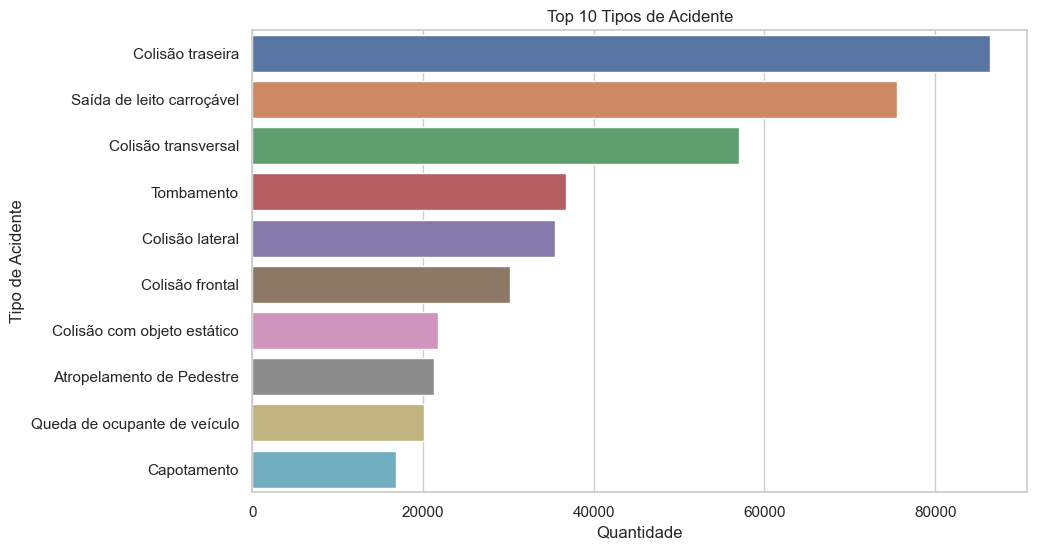

In [70]:
# Top 10 tipos de acidente
top10 = df['tipo_acidente'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top10.index, x=top10.values)
plt.title('Top 10 Tipos de Acidente')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Acidente')
plt.show()


**Insight:**  
Os três tipos de acidente mais frequentes são **colisão traseira**, **saída de leito carroçável** e **colisão transversal**, todos geralmente associados a **falta de atenção, excesso de velocidade** e **manobras indevidas**.

Esse padrão pode estar fortemente ligado ao uso de **dispositivos móveis enquanto se dirige**, uma das principais causas de distração no trânsito. Olhar o celular por apenas 3 segundos pode ser o suficiente para provocar uma colisão traseira ou perder o controle do veículo, resultando em saída de pista.

A presença significativa de acidentes como **atropelamento de pedestres** e **queda de ocupante de veículo** reforça também a importância da conscientização tanto de condutores quanto de pedestres.


#### 7. Número de Acidentes por Estado (UF)

Nesta visualização, vamos observar a distribuição de acidentes de trânsito ao longo dos estados brasileiros para entender quais regiões concentram maior número de ocorrências.


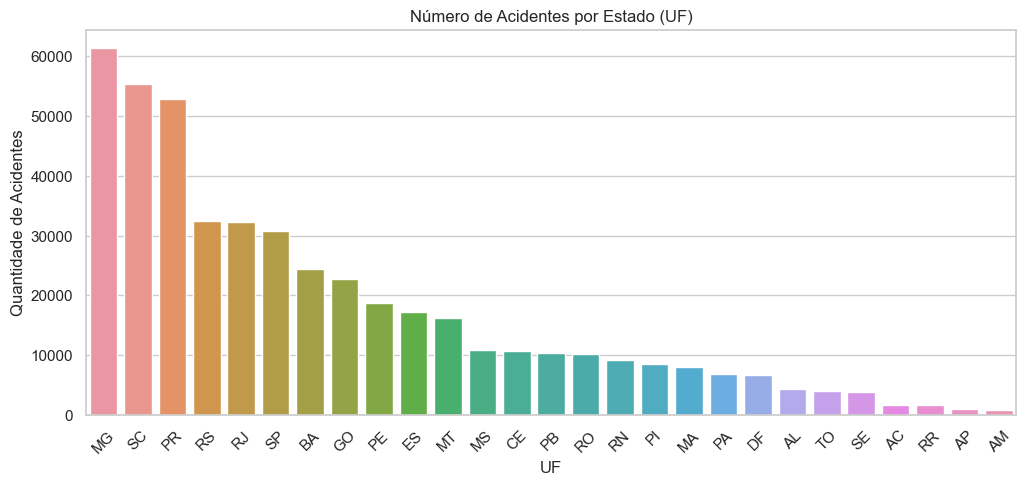

In [71]:
# e) Acidentes por Estado (UF)
cont_uf = df['uf'].value_counts()
plt.figure(figsize=(12,5))
sns.barplot(x=cont_uf.index, y=cont_uf.values)
plt.title('Número de Acidentes por Estado (UF)')
plt.xlabel('UF')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=45)
plt.show()


**Insight:**  
O estado de **Minas Gerais (MG)** lidera com folga o número de acidentes, seguido por **Santa Catarina (SC)**, **Paraná (PR)** e **Rio Grande do Sul (RS)**. Essa concentração nos estados do Sul e Sudeste pode estar relacionada a fatores como:

- Alta densidade de rodovias federais e estaduais;
- Intenso fluxo de transporte de cargas e veículos particulares;
- Alto número de cidades médias e grandes interligadas por rodovias movimentadas.

Vale destacar que estados como **SP e RJ**, mesmo com grandes frotas, aparecem com menos acidentes registrados no dataset, o que pode indicar diferenças na malha viária monitorada pela Polícia Rodoviária Federal (PRF), foco da base de dados.

Já regiões como **Norte e Nordeste**, com menor presença de rodovias federais em relação ao território total, apresentam números bem inferiores — o que não necessariamente significa menor risco, mas sim menos cobertura registrada.


#### 8. Proporção de Classificação dos Acidentes por Período do Dia

Nesta visualização, vamos analisar a gravidade dos acidentes em cada período do dia, observando a proporção entre acidentes com vítimas feridas, fatais e sem vítimas.


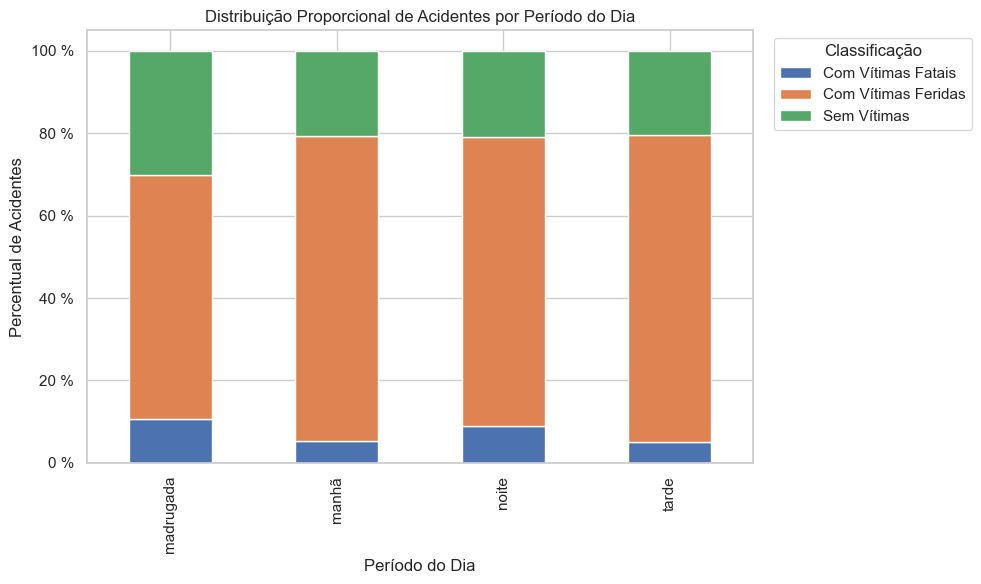

In [72]:
# Proporção de Classificação dos Acidentes por Período do Dia
cruz1 = df.groupby(['periodo_do_dia','classificacao_acidente']) \
          .size() \
          .reset_index(name='count')

# 1) Pivot_table para obter uma tabela limpa
pivot = cruz1.pivot_table(
    index='periodo_do_dia',
    columns='classificacao_acidente',
    values='count',
    aggfunc='sum'
)

# 2) Converter em proporções (%)
prop = pivot.div(pivot.sum(axis=1), axis=0) * 100

# 3) Plot do stacked bar
ax = prop.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6)
)

# 4) Formatador para exibir %
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x)} %'))

plt.title('Distribuição Proporcional de Acidentes por Período do Dia')
plt.xlabel('Período do Dia')
plt.ylabel('Percentual de Acidentes')
plt.legend(title='Classificação', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Insight:**  
A **madrugada**, apesar de ter o menor número absoluto de acidentes, apresenta a **maior proporção de acidentes com vítimas fatais**, superando os demais períodos do dia. Esse dado é consistente com estudos de segurança viária, que apontam maior gravidade em acidentes noturnos e de madrugada devido a:

- Excesso de velocidade em vias vazias;
- Cansaço ou sono dos motoristas;
- Maior incidência de direção sob efeito de álcool ou substâncias.

Já durante o dia (manhã, tarde e noite), a maior parte dos acidentes envolve vítimas feridas, mas com menor letalidade proporcional. Isso reforça a importância de medidas específicas de fiscalização e prevenção em horários de risco elevado, como a madrugada.


#### 9. Percentual de Acidentes com Vítimas Fatais por Tipo (Top 10)

Nesta visualização, analisamos os 10 tipos de acidente mais frequentes, observando **qual percentual deles resultou em vítimas fatais**.


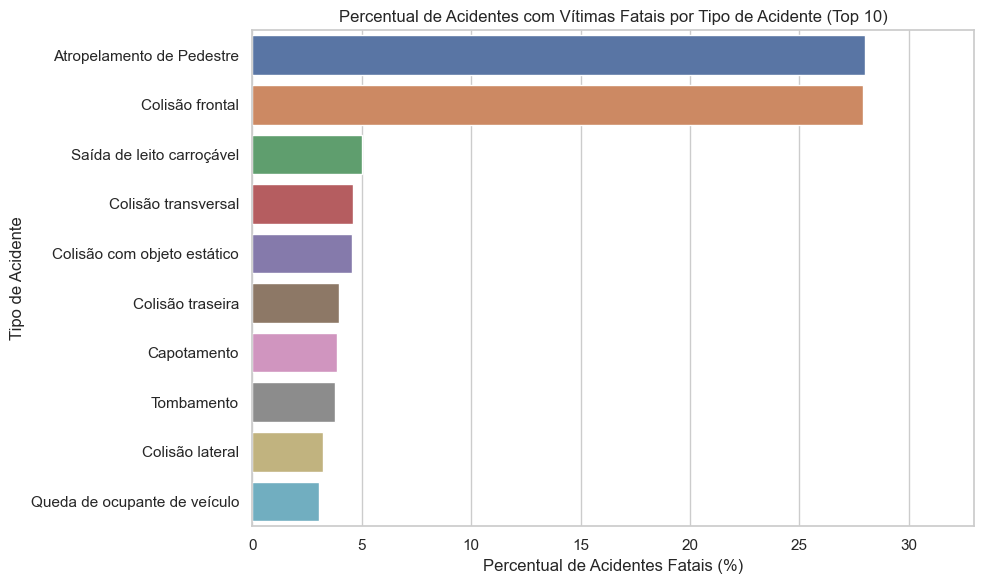

In [80]:
# Percentual de Acidentes com Vítimas Fatais por Tipo (Top 10)
df['fatal'] = df['classificacao_acidente'] == 'Com Vítimas Fatais'
percent_fatal = df.groupby('tipo_acidente')['fatal'].mean() * 100
top10 = df['tipo_acidente'].value_counts().head(10).index
percent_fatal_top10 = percent_fatal.loc[top10].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=percent_fatal_top10.values, y=percent_fatal_top10.index)
plt.title('Percentual de Acidentes com Vítimas Fatais por Tipo de Acidente (Top 10)')
plt.xlabel('Percentual de Acidentes Fatais (%)')
plt.ylabel('Tipo de Acidente')
plt.xlim(0, percent_fatal_top10.max() + 5)
plt.tight_layout()
plt.show()

**Insight:**  
Os tipos de acidente com **maior letalidade proporcional** são o **atropelamento de pedestres** e a **colisão frontal**, ambos com quase **30% de ocorrência fatal**. Embora não sejam os mais frequentes, esses acidentes têm alto potencial de morte e demandam atenção especial em campanhas de prevenção.

O **atropelamento de pedestre** pode estar relacionado tanto à imprudência de motoristas quanto à desatenção de quem atravessa, muitas vezes com **fones de ouvido ou olhando o celular**, sem verificar o fluxo da via. É fundamental reforçar a **conscientização de pedestres** sobre a importância de atravessar com atenção e visibilidade, além de criar estruturas seguras, como passarelas e faixas bem sinalizadas.

Já a **colisão frontal** está geralmente ligada à **ultrapassagem indevida ou distração ao volante**, sendo fortemente agravada pelo **uso de celular enquanto se dirige**. Uma simples olhada para o telefone pode resultar em invasão de pista e acidentes com altíssimo risco de morte. Isso reforça a urgência de políticas públicas voltadas ao uso responsável do celular no trânsito, fiscalização efetiva e campanhas de educação contínua para motoristas e pedestres.


#### 10. Percentual de Acidentes com Vítimas Fatais por Causa (Top 10)

Nesta visualização, analisamos as 10 causas de acidente mais associadas a mortes no trânsito, ordenadas pelo percentual de ocorrência fatal.


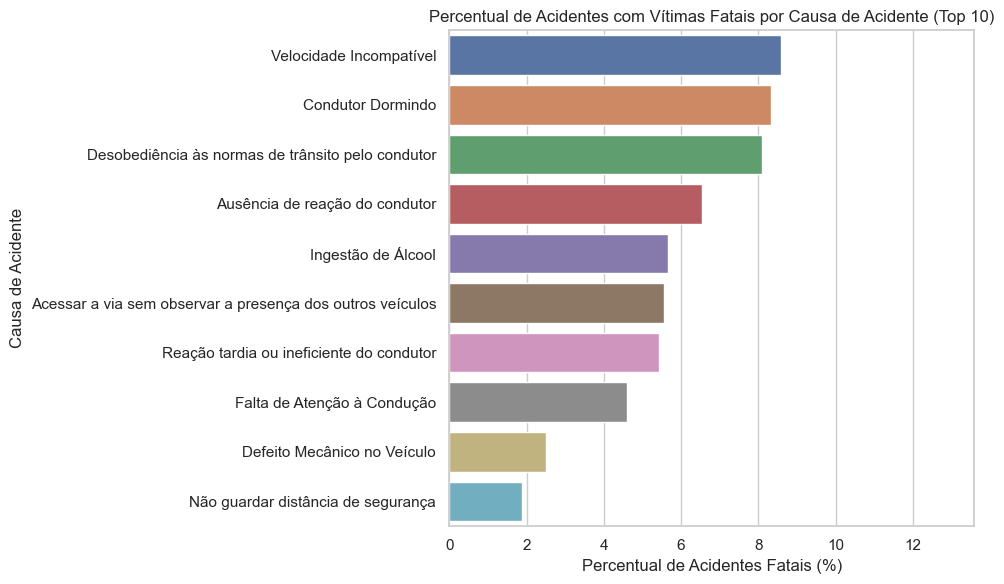

In [81]:
# Percentual de Acidentes com Vítimas Fatais por Causa (Top 10)
df['fatal'] = df['classificacao_acidente'] == 'Com Vítimas Fatais'
percent_fatal = df.groupby('causa_acidente')['fatal'].mean() * 100
top10 = df['causa_acidente'].value_counts().head(10).index
percent_fatal_top10 = percent_fatal.loc[top10].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=percent_fatal_top10.values, y=percent_fatal_top10.index)
plt.title('Percentual de Acidentes com Vítimas Fatais por Causa de Acidente (Top 10)')
plt.xlabel('Percentual de Acidentes Fatais (%)')
plt.ylabel('Causa de Acidente')
plt.xlim(0, percent_fatal_top10.max() + 5)
plt.tight_layout()
plt.show()

**Insight:**  
As causas com maior percentual de acidentes fatais são **velocidade incompatível**, **condutor dormindo** e **desobediência às normas de trânsito**, todas diretamente relacionadas ao comportamento e à responsabilidade do motorista.

Entre os fatores humanos, destacam-se ainda a **ausência de reação**, **ingestão de álcool** e **reação tardia**, indicando que boa parte das fatalidades poderia ser evitada com maior atenção, descanso adequado e direção defensiva.

O uso de **celulares no volante**, embora nem sempre registrado diretamente na base, está fortemente associado à categoria **falta de atenção à condução** e à **reação ineficiente**, pois reduz a capacidade de resposta em situações críticas. Olhar o celular por alguns segundos pode ser o suficiente para provocar colisões fatais, especialmente em alta velocidade.

Esse panorama reforça a importância de **campanhas educativas, fiscalização rigorosa e políticas de prevenção**, focando no comportamento do condutor, que é a principal variável evitável nos acidentes mais graves.


#### 11.  Acidentes por Condição Meteorológica

Nesta visualização, vamos analisar em quais condições climáticas ocorrem mais acidentes, considerando o tempo no momento da ocorrência registrado pela PRF.


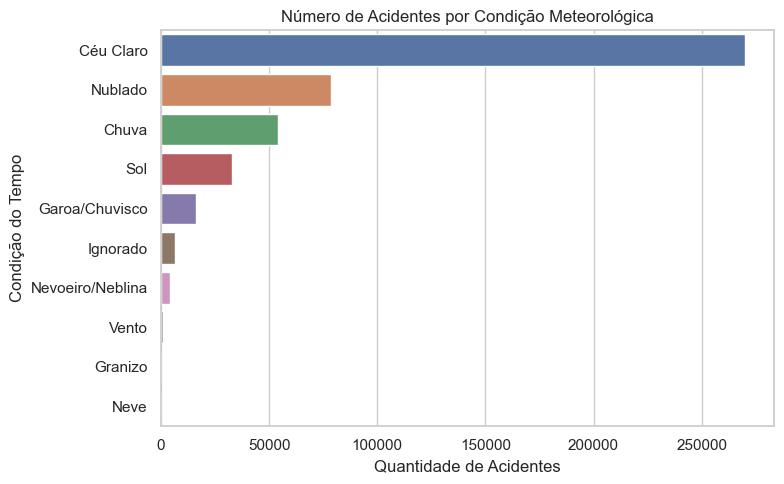

In [87]:
# Acidentes por condição climática
cont_clima = df['condicao_metereologica'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=cont_clima.values, y=cont_clima.index)
plt.title('Número de Acidentes por Condição Meteorológica')
plt.xlabel('Quantidade de Acidentes')
plt.ylabel('Condição do Tempo')
plt.tight_layout()
plt.show()

**Insight:**  
A grande maioria dos acidentes ocorreu sob **céu claro**, seguido de **nublado** e **chuva**. Isso não significa necessariamente que condições ruins causam menos acidentes, mas sim que a **maior parte do tráfego ocorre em clima bom**, e por isso concentra naturalmente mais registros.

Ainda assim, o número expressivo de ocorrências em dias de **chuva** e **garoa/chuvisco** chama atenção, pois essas condições reduzem a aderência do veículo ao solo, aumentam a distância de frenagem e exigem mais atenção do condutor.

A presença de acidentes até mesmo em situações extremas como **nevoeiro/neblina, vento e granizo** (embora com poucos registros) reforça a necessidade de cautela redobrada quando o clima estiver adverso.  

Além disso, dirigir em céu claro pode gerar **falsa sensação de segurança**, levando a excessos como velocidade alta ou uso de celular — que em qualquer condição, seguem sendo comportamentos de risco.


#### 12. Top 5 Tipos de Acidente por Condição Meteorológica

Nesta visualização, observamos como os cinco tipos de acidente mais comuns se distribuem em diferentes condiçõ


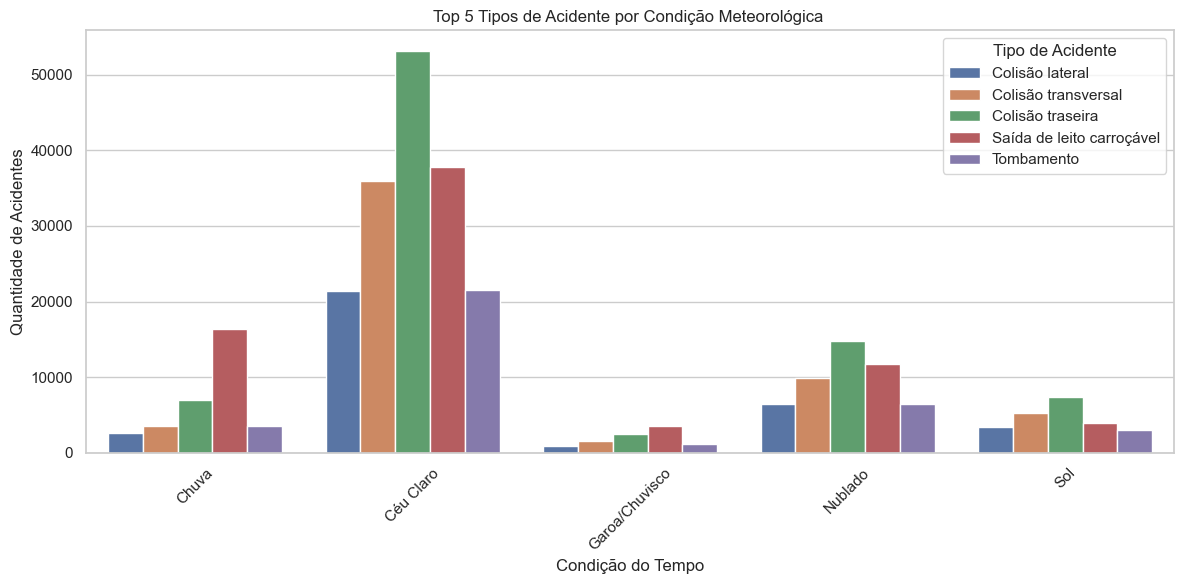

In [83]:
 # Top 5 Tipos de Acidente por Condição Meteorológica
    #Definir condições a analisar
conds = ["Chuva", "Céu Claro", "Garoa/Chuvisco", "Nublado", "Sol"]

# Top 5 tipos de acidente
top5 = df['tipo_acidente'].value_counts().head(5).index

# Filtrar apenas registros com as condições desejadas e top5 tipos
df_sub = df[
    df['condicao_metereologica'].isin(conds) &
    df['tipo_acidente'].isin(top5)
]

# Agrupar e contar
cruz_clima_tipo = (
    df_sub
    .groupby(['condicao_metereologica', 'tipo_acidente'])
    .size()
    .reset_index(name='count')
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=cruz_clima_tipo,
    x='condicao_metereologica',
    y='count',
    hue='tipo_acidente'
)
plt.title('Top 5 Tipos de Acidente por Condição Meteorológica ')
plt.xlabel('Condição do Tempo')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Acidente')
plt.tight_layout()
plt.show()

**Insight:**  
Mesmo em condições de **céu claro**, acidentes como **colisão traseira**, **transversal** e **saída de leito carroçável** permanecem predominantes. Isso reforça a ideia de que o fator climático por si só **não é suficiente para reduzir o risco**, especialmente se houver comportamentos imprudentes como **alta velocidade**, **ultrapassagens perigosas** ou **uso de celular ao volante**.

Já em condições adversas como **chuva**, **garoa** ou **nublado**, nota-se uma queda geral nas quantidades absolutas — mas com destaque para o aumento proporcional de **saídas de leito carroçável** e **tombamentos**, sugerindo perda de controle do veículo em pistas molhadas ou escorregadias.

Esse cenário evidencia a necessidade de **conduta mais cautelosa durante o tempo ruim**, mas também reforça que **a imprudência em dias de sol pode ser igualmente perigosa**, justamente por passar uma falsa sensação de segurança.


#### 12.  Percentual de Acidentes Fatais por Condição Meteorológica

Nesta visualização, vamos observar agora, entre os acidentes ocorridos em diferentes condições climáticas, **qual proporção resultou em mortes**, independentemente do volume total de ocorrências.


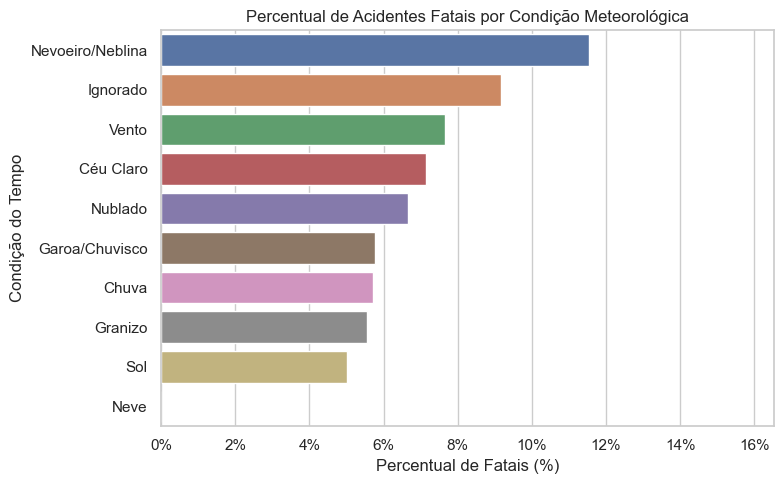

In [77]:
# Calcular percentual fatal por clima
percent_fatal_clima = (
    df.groupby('condicao_metereologica')['fatal']
    .mean() * 100
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=percent_fatal_clima.values, y=percent_fatal_clima.index)
plt.title('Percentual de Acidentes Fatais por Condição Meteorológica')
plt.xlabel('Percentual de Fatais (%)')
plt.ylabel('Condição do Tempo')
plt.xlim(0, percent_fatal_clima.max() + 5)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}%'))
plt.tight_layout()
plt.show()


**Insight:**  
Embora a maior parte dos acidentes ocorra com **céu claro**, as **condições de baixa visibilidade**, como **nevoeiro e neblina**, lideram o percentual de acidentes fatais, ultrapassando **11%** de letalidade. Isso indica que, mesmo com menor número absoluto, essas condições são extremamente perigosas, exigindo atenção redobrada e velocidade reduzida.

Outros destaques são os acidentes com tempo **"ignorado"**, que podem representar situações não registradas corretamente, e o grupo **"vento"**, onde a instabilidade também pode gerar perda de controle do veículo.

Curiosamente, **condições comuns como chuva e garoa** apresentam percentual de fatalidade **inferior ao de céu claro**, o que pode indicar que motoristas tendem a dirigir com mais cautela em clima ruim — enquanto **em dias ensolarados, a imprudência aumenta**,


## 📌 Conclusão Geral

#### 🌟 Destaques da Análise

↓ Redução no número de acidentes ao longo dos anos, com destaque para a forte queda em 2023.

🌈 Meses mais críticos: janeiro, julho e agosto, sugerindo influência de férias e feriados.

🌞 Manhã e tarde concentram mais acidentes, mas na madrugada tem a maior proporção de fatalidades.

🎓 Sábado e domingo são os dias mais perigosos, indicando aumento do risco em fins de semana.

📈 "Com Vítimas Feridas" é a classificação mais comum, mas os fatais têm padrões bem definidos.

🌺 Atropelamentos e colisões frontais têm as maiores taxas de morte.

⚡ Velocidade, sono e desobediência são as principais causas fatais.

🌎 MG, SC, PR e RS lideram em quantidade absoluta de acidentes.

☀️ Acidentes ocorrem principalmente em clima bom, mas nevoeiro e neblina são os mais fatais proporcionalmente.

##### 🧠 Interpretação Crítica

Apesar do avanço em campanhas e tecnologias, os dados mostram que comportamentos humanos continuam sendo os principais responsáveis pelas ocorrências graves. Muitos acidentes poderiam ser evitados com atitudes simples:

Não usar celular ao volante 📱

Respeitar os limites de velocidade ⚡

Evitar direção com sono ou sob efeito de álcool 🥂

Conscientização de pedestres – atravessar com atenção e evitar distrações

###### 🚦 Recomendações para Gestores e Sociedade

🌊 Intensificar campanhas educativas sobre riscos reais no trânsito

⛔️ Reforçar fiscalização noturna e em fins de semana

⚠️ Investir em infraestrutura mais segura, com sinalização e dispositivos inteligentes

🌎 Regionalizar as estratégias com base nos estados mais críticos

#### 🌟 Encerramento

Este projeto mostrou que a análise de dados é uma ferramenta poderosa para entender e prevenir acidentes. Mais do que números, os dados revelam comportamentos, apontam vulnerabilidades e oferecem caminhos para salvar vidas.

O próximo passo é transformar esses insights em ações concretas.

“A verdadeira mudança no trânsito começa com a consciência de cada um.”